<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Project Scenario:
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

## Task 1 
### Become familiar with the dataset 
The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: 
### Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

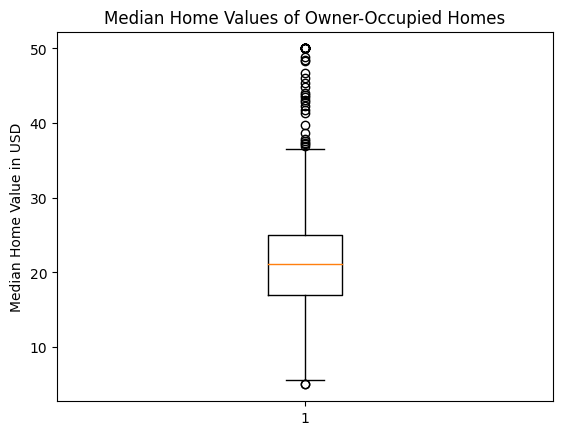

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(boston_df['MEDV'],)
plt.title('Median Home Values of Owner-Occupied Homes')
plt.ylabel('Median Home Value in USD')
plt.show()

Provide a bar plot for the Charles river variable

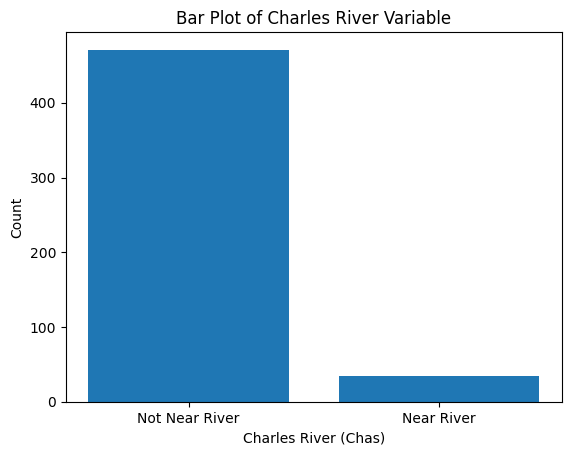

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [14]:
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(chas_counts.index, chas_counts.values)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
plt.show()
chas_counts.index

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

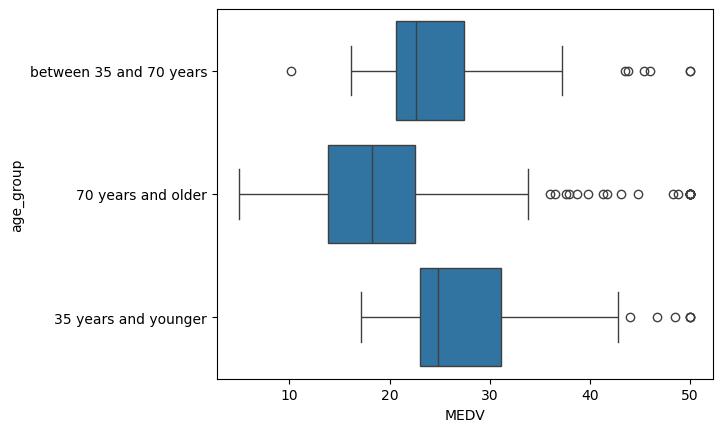

In [15]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='MEDV',y = 'age_group', data = boston_df)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

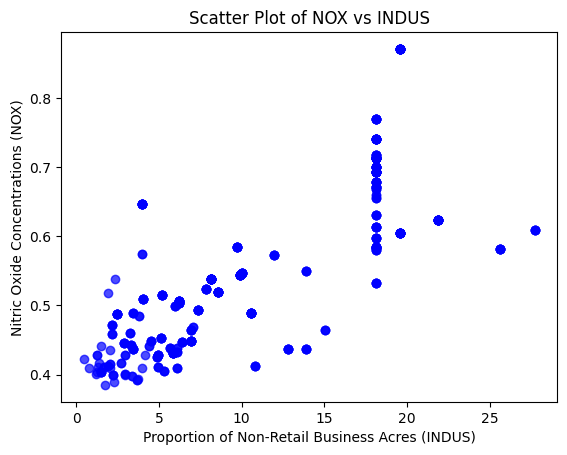

In [16]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

Create a histogram for the pupil to teacher ratio variable

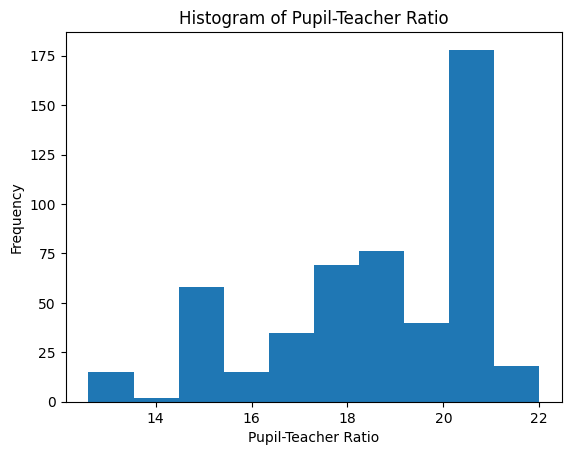

In [21]:
plt.hist(boston_df['PTRATIO'], bins=10)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

## Task 3: 
### Use the appropriate tests to answer the questions provided for each of the following questions;
State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

**Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypothesis

H0: µ1=µ2 (There is no difference in median value of houses if it is bounded by the Charles river)

H1: µ1=!µ2 (There is difference in median value of houses if it is bounded by the Charles river)

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on boundness by Charles river

**Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

ANOVA test Hypothesis

H0: there is no difference in median values of houses of each proportion of owner-occupied units built before 1940

H1: there is a significant difference in median values of houses of each proportion of owner-occupied units built before 1940

In [24]:
boston_df.loc[(boston_df['AGE']<=35),'age']='35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age']='between 35 and 70'
boston_df.loc[boston_df['AGE']>=70,'age']='70 and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,age
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,between 35 and 70


In [28]:
a35_younger=boston_df[boston_df['age']=='35 and younger']['MEDV']
between_35_70=boston_df[boston_df['age']=='between 35 and 70']['MEDV']
a70_older=boston_df[boston_df['age']=='70 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(a35_younger, between_35_70, a70_older)
print('f_statistic value = '+str(f_statistic)+'\nP-value = '+str(p_value) )

f_statistic value = 36.40764999196599
P-value = 1.7105011022702984e-15


Conclusion: The result from ANOVA test suggest that we can reject the null hypothesis given the p-value, hence there is a significant difference in median values of houses of each proportion of owner-occupied units built before 1940

**Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

### Pearson Correlation test Hypothesis
H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

H1: There a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

In [29]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


Conclusion: The null hypothesis is rejected as the Nitric oxide concentration and the proportion of non-retail business acres are correlated

**Q3. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [32]:
import statsmodels.api as sm
import math
#the independant variable
X = boston_df['DIS']
#intercept
X = sm.add_constant(X)
# Dependant variable
Y=boston_df['MEDV']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        10:30:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
correlation_coef=math.sqrt(0.062)
print("Correlation coefficient = "+str(correlation_coef))

Correlation coefficient = 0.24899799195977465


Conclusion: The coefficient for the additional weighted distance to the five Boston employment centers (DIS) is 1.0916. Therefore, for each unit increase in the additional weight distance, the median value of owner-occupied homes increases by 1091.6